   X  Y  month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5      3    5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4     10    2  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4     10    6  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6      3    5  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6      3    7  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0
                X           Y       month         day        FFMC         DMC  \
count  299.000000  299.000000  299.000000  299.000000  299.000000  299.000000   
mean     4.652174    4.290970    7.327759    4.240803   90.507692   91.893311   
std      2.290794    1.294912    2.518309    2.106766    4.093682   46.496307   
min      1.000000    2.000000    1.000000    1.000000   63.500000    2.400000   
25%      3.000000    4.000000    7.000000    2.000000   90.100000   48.400000   
50%      4.000000    4.000000    8.000000    5.000000   91.600000   99.600000   
7

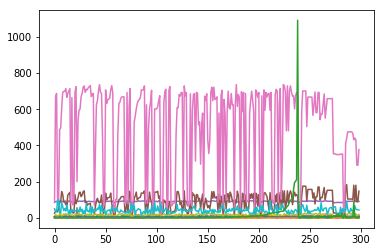

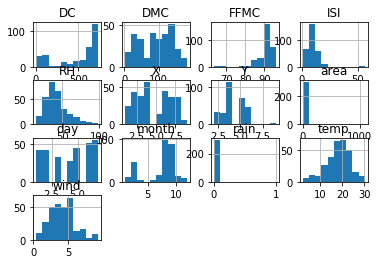

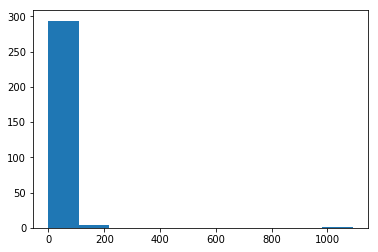

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


AxesSubplot(0.731522,0.125;0.168478x0.16413)


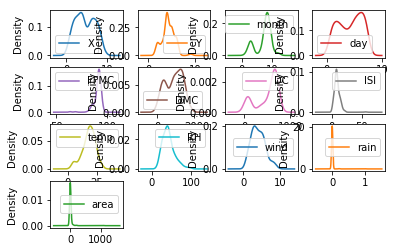

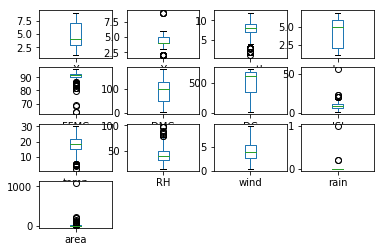

AxesSubplot(0.125,0.125;0.775x0.755)


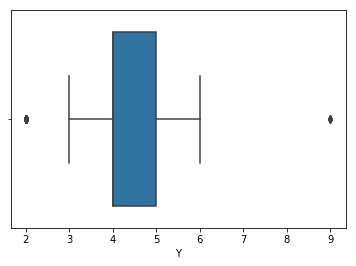

AxesSubplot(0.125,0.125;0.775x0.755)


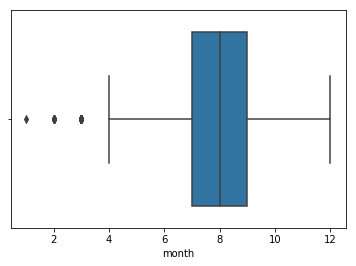

AxesSubplot(0.125,0.125;0.775x0.755)


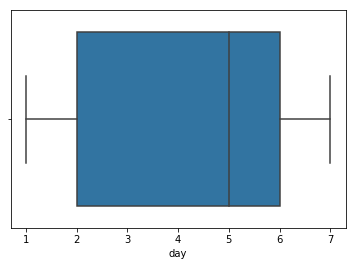

AxesSubplot(0.125,0.125;0.775x0.755)


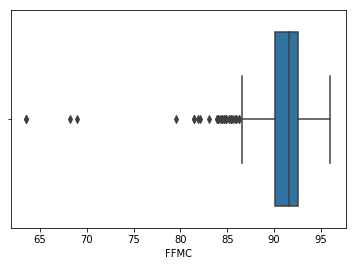

AxesSubplot(0.125,0.125;0.775x0.755)


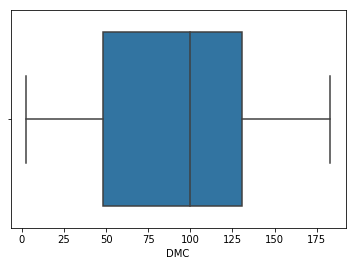

AxesSubplot(0.125,0.125;0.775x0.755)


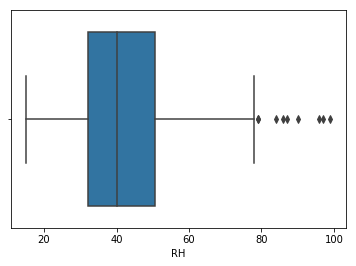

AxesSubplot(0.125,0.125;0.775x0.755)


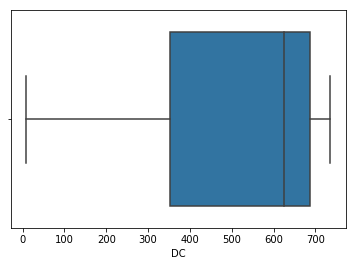

AxesSubplot(0.125,0.125;0.775x0.755)


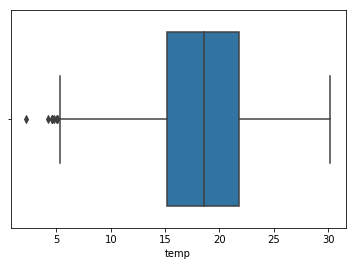

AxesSubplot(0.125,0.125;0.775x0.755)


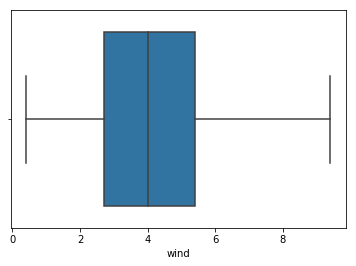

AxesSubplot(0.125,0.125;0.775x0.755)


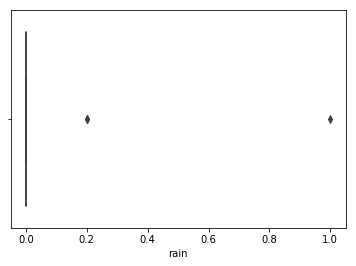

AxesSubplot(0.125,0.125;0.775x0.755)


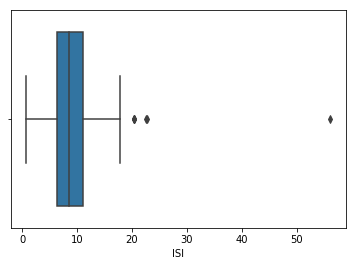

[[  7.    5.    8.  ...,  51.    6.7   0. ]
 [  7.    4.   10.  ...,  33.    0.9   0. ]
 [  7.    4.   10.  ...,  33.    1.3   0. ]
 ..., 
 [  6.    4.    6.  ...,  46.    1.8   0. ]
 [  8.    6.    6.  ...,  45.    2.2   0. ]
 [  8.    6.    6.  ...,  43.    4.9   0. ]]
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_ede1a9fa33e64743bfa575598005cfa2 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='12Z743nZIwDIVp1VsZ5Nz-On9XakdlJJkxFiRb-vFEeM',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_ede1a9fa33e64743bfa575598005cfa2.get_object(Bucket='analysisonforestfire-donotdelete-pr-nuuohb6kd3ej5p',Key='forestfire.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

ff = pd.read_csv(body)
ff.head()

ff.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
ff.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

print(ff.head())
print(ff.describe())
print(ff.corr())
print(ff.dtypes)

plt.plot(ff)
plt.show()
ff.hist()
plt.show()
plt.hist((ff.area))
plt.show()

ff.plot(kind='density',subplots=True,layout=(4,4),sharex=False,sharey=False)
ff.plot(kind='box',subplots=True,layout=(4,4),sharex=False,sharey=False)

ff.boxplot()

print(sns.boxplot(x=ff['X']))
plt.show()
print(sns.boxplot(x=ff['Y']))
plt.show()
print(sns.boxplot(x=ff['month']))
plt.show()
print(sns.boxplot(x=ff['day']))
plt.show()
print(sns.boxplot(x=ff['FFMC']))
plt.show()
print(sns.boxplot(x=ff['DMC']))
plt.show()
print(sns.boxplot(x=ff['RH']))
plt.show()
print(sns.boxplot(x=ff['DC']))
plt.show()
print(sns.boxplot(x=ff['temp']))
plt.show()
print(sns.boxplot(x=ff['wind'])) 
plt.show()
print(sns.boxplot(x=ff['rain'])) 
plt.show()
print(sns.boxplot(x=ff['ISI']))
plt.show()


mean=np.mean(ff['X'],axis=0)
sd=np.std(ff['X'],axis=0)
ff['X'] = [x for x in ff['X'] if (x > mean - 2 * sd)]
ff['X'] = [x for x in ff['X'] if (x < mean + 2 * sd)]

ym=ff.Y.median()
xm=ff.X.median()
mm=ff.month.median()
daym=ff.day.median()
ffmcm=ff.FFMC.median()
Dcm=ff.DC.median()
Dmcm=ff.DMC.median()
Isim=ff.ISI.median()
tm=ff.temp.median()
wm=ff.wind.median()
RHm=ff.RH.median()
rainm=ff.rain.median()

ff['FFMC']=ff['FFMC'].mask((ff['FFMC']<85),ffmcm)
ff['DMC']=ff['DMC'].mask((ff['DMC']>250),Dmcm)
ff['DC']=ff['DC'].mask((ff['DC']<50),Dcm)
ff['ISI']=ff['ISI'].mask((ff['ISI']>18),Isim)
ff['temp']=ff['temp'].mask((ff['temp']<5),tm)
ff['RH']=ff['RH'].mask((ff['RH']>80),RHm)
ff['wind']=ff['wind'].mask((ff['wind']>8),wm)
ff['Y']=ff['Y'].mask((ff['Y']<3)|(ff['Y']>6),ym)
ff['month']=ff['month'].mask((ff['month']<4),mm)


fff = ff.values
X = fff[:,0:12]
y = fff[:,12]
print(X)
print(y)


from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)



from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

y_pred=regressor.predict(X_test)
 
print(y_pred)
print(y_test)


from sklearn import metrics
print('MAE',metrics.mean_absolute_error(y_test,y_pred))
print('MSE',metrics.mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('r^2',metrics.r2_score(y_test,y_pred))


